## Lifecycle of a Data Science Projects

1. Data Collection Statergy---from company side,3rd party API's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey

* They hesitate to put down the information
* Survey informations are not that valid
* Men--salary
* Women---age
* People may have died----NAN

### What are the different types of Missing Data?
Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [3]:
import pandas as pd

In [107]:
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv',)

In [108]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data[data['Embarked'].isnull()] ##MCAR

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [11]:
import numpy as np
data['cabin_null'] = np.where(data['Cabin'].isnull(),1,0)


#Find the percentage value
data['cabin_null'].mean()

0.7710437710437711

In [12]:
data.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

3. MAR(Missing At Random)

* Men---hide their salary
* Women---hide their age

### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

### Mean/ MEdian /Mode imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv',usecols=['Age','Fare','Survived'])

In [15]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
#lets go and see the percentage of missing Values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [17]:
def impute_nan(df,variable,median):
    df[variable+"_median_"]=df[variable].fillna(median)

In [19]:
median = df.Age.median()
median

28.0

In [21]:
impute_nan(df,'Age',median)

In [22]:
df.head()

,Survived,Age,Fare,Age_median_
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [26]:
print(df['Age'].std())
print(df['Age_median_'].std())

14.526497332334044
13.019696550973194


In [27]:
import matplotlib.pyplot as plt

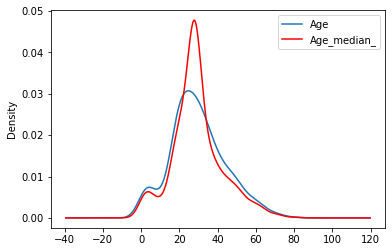

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median_.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation
* Advantages-
* Easy to implement(Robust to outliers)
* Faster way to obtain the complete dataset 
* Disadvantages-
* Change or Distortion in the original variance
* Impacts Correlation

## Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [30]:
import pandas as pd

In [32]:
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv',usecols=['Age','Fare','Survived'])

In [33]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
data.isnull().sum() #No of Missing Values

Survived      0
Age         177
Fare          0
dtype: int64

In [35]:
data.isnull().mean() # percentage of missing Values

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [36]:
data['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [37]:
data[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [38]:
def impute_nan(data,variable,median):
    data[variable+"_median"]=data[variable].fillna(median)
    data[variable+"_random"]=data[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=data[data[variable].isnull()].index
    data.loc[df[variable].isnull(),variable+'_random']=random_sample

In [39]:
median=df.Age.median()

In [40]:
impute_nan(data,"Age",median)

In [41]:
data.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


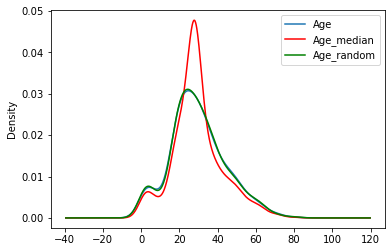

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data.Age_median.plot(kind='kde', ax=ax, color='red')
data.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages
* Easy To implement
* There is less distortion in variance

### Disadvantage
* Every situation randomness wont work

## Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [45]:
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv',usecols=['Age','Fare','Survived'])

In [46]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
data['Age_NAN']=np.where(data['Age'].isnull(),1,0)

In [48]:
data.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [50]:
data.Age.median()

28.0

In [51]:
data['Age'].fillna(df.Age.median(),inplace=True)

In [52]:
data.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages
* Easy to implement
* Captures the importance of missing values

### Disadvantages
* Creating Additional Features(Curse of Dimensionality)

# End of Distribution imputation

In [53]:
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv',usecols=['Age','Fare','Survived'])

In [54]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


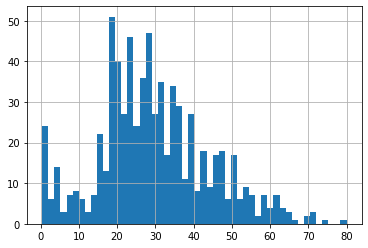

In [55]:
data.Age.hist(bins=50)

In [56]:
extreme=data.Age.mean()+3*df.Age.std()

In [57]:
extreme

73.27860964406095

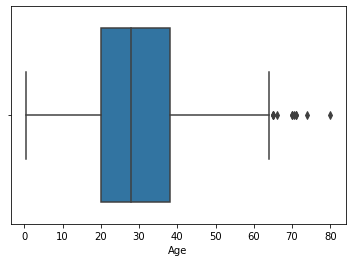

In [58]:
import seaborn as sns
sns.boxplot('Age',data=data)

In [59]:
def impute_nan(df,variable,median,extreme):
    data[variable+"_end_distribution"]=data[variable].fillna(extreme)
    data[variable].fillna(median,inplace=True)

In [60]:
impute_nan(data,'Age',df.Age.median(),extreme)

In [61]:
data.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


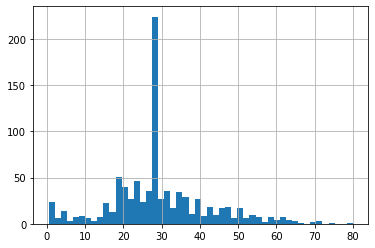

In [62]:
data.Age.hist(bins=50)

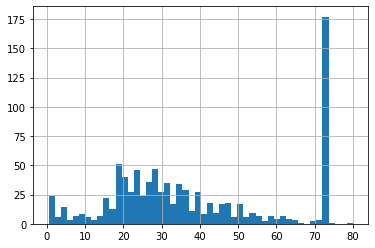

In [64]:
data.Age_end_distribution.hist(bins=50)

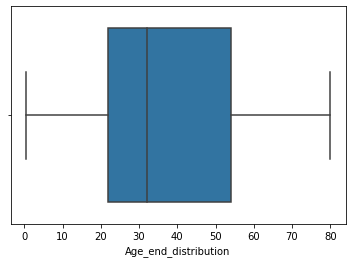

In [65]:
sns.boxplot('Age_end_distribution',data=data)

## Arbitrary Value Imputation
* This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [66]:
import pandas as pd

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv',usecols=['Age','Fare','Survived'])

In [68]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [69]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

### Advantages
* Easy to implement
* Captures the importance of missingess if there is one

### Disadvantages
* Distorts the original distribution of the variable
* If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
* Hard to decide which value to use


## How To Handle Categroical Missing Values

In [70]:
## Frequent category imputation

In [73]:
df = pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [74]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [75]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [77]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

## Compute the frequency with every feature

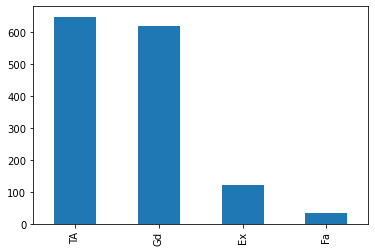

In [80]:
df['BsmtQual'].value_counts().plot.bar()

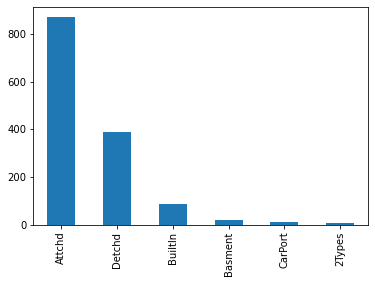

In [81]:
df['GarageType'].value_counts().plot.bar()

In [86]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [87]:
def impute_nan(df,variable):
    most_frequent_var = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_var,inplace=True)

In [88]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [89]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### Advantages
* Easy To implement
* Fater way to implement 

#### Disadvantages
* Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
* It distorts the relation of the most frequent label

## Adding a variable to capture NAN

In [90]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [91]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [92]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [93]:
frequent = df['BsmtQual'].mode()[0]

In [94]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [95]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [96]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [97]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


## Suppose if you have more frequent categories, we just replace NAN with a new category

In [98]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [99]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [102]:
def impute_nan(df,variable):
    df[variable]=np.where(df[variable].isnull(),'missing',df[variable])

In [103]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [105]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,missing,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000
